In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('WR_FF_2020_to_2022.csv')

In [ ]:
df.head()

In [137]:
df.corr()['FPTS'].sort_values(ascending=False)



C:\Users\garco\AppData\Local\Temp\ipykernel_3516\3632624037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['FPTS'].sort_values(ascending=False)


FPTS/G    1.000000
FPTS      1.000000
Yds       0.988108
1D        0.983300
Tgt       0.977088
Rec       0.975047
YBC       0.904453
TD        0.886035
YAC       0.860448
Drop      0.716035
GS        0.688965
Int       0.673802
BrkTkl    0.629567
Rec/Br    0.468761
G         0.444507
YBC/R     0.297239
Rat       0.297051
ADOT      0.234764
Age       0.026840
YEAR     -0.002945
YAC/R    -0.069781
Drop%    -0.086544
Rk       -0.848174
Name: FPTS, dtype: float64

In [138]:
columns_to_drop = ['Rk', 'Drop%', 'YAC/R', 'Rat', 'YBC', 'YBC/R', 'G', 'GS', 'Rec/Br', 'BrkTkl', 'Int', 'FPTS', 'FPTS/G', 'Pos', 'Tm']
X = df.drop(columns_to_drop, axis=1)
y = df['FPTS']

X.sort_values(['Player', 'YEAR'], inplace=True)

# Shift the stats for each player by one year
shifted_stats = X.groupby('Player').shift(fill_value=0)

# Rename the columns with "Prev_" prefix to indicate previous years' stats
shifted_stats.columns = [f'Prev_{col}' for col in shifted_stats.columns]

# Concatenate the original DataFrame with the shifted stats
X = pd.concat([X, shifted_stats], axis=1)


In [ ]:
X.head()

In [139]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Label encode the 'Player' column
X['Player_ID'] = label_encoder.fit_transform(X['Player'])

In [140]:
X.drop('Player', axis=1,inplace=True)

In [143]:
#Fill columns with NaN to 0
X['1D'].fillna(0, inplace=True)
X['Prev_1D'].fillna(0, inplace=True)


In [144]:
rows_with_nan = X[X.isna().any(axis=1)]
rows_with_nan

,Age,Tgt,Rec,Yds,TD,1D,YAC,ADOT,Drop,YEAR,...,Prev_Tgt,Prev_Rec,Prev_Yds,Prev_TD,Prev_1D,Prev_YAC,Prev_ADOT,Prev_Drop,Prev_YEAR,Player_ID


In [145]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [158]:
#Using Ridge and GridSearch to find best results
model = Ridge(alpha=1)

base_elastic_model = ElasticNet()

param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [159]:
model.fit(X_train,y_train)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [160]:
grid_model.best_estimator_

ElasticNet(alpha=1, l1_ratio=0.99)

In [161]:
#Model prefers L1 regression
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 0.99}

In [163]:
y_pred = model.predict(X_test)
y_pred_grid = grid_model.predict(X_test)

In [171]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [172]:
mean_absolute_error(y_test,y_pred)

49.207795066827465

In [173]:
mean_absolute_error(y_test,y_pred_grid)

48.41854138798374

In [174]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
RMSE

65.89793188226176

In [177]:
MSEG = mean_squared_error(y_test,y_pred_grid)
RMSEG = np.sqrt(MSEG)
RMSEG

65.07062455271165

In [176]:
np.mean(df['FPTS'])

56.937818877551024

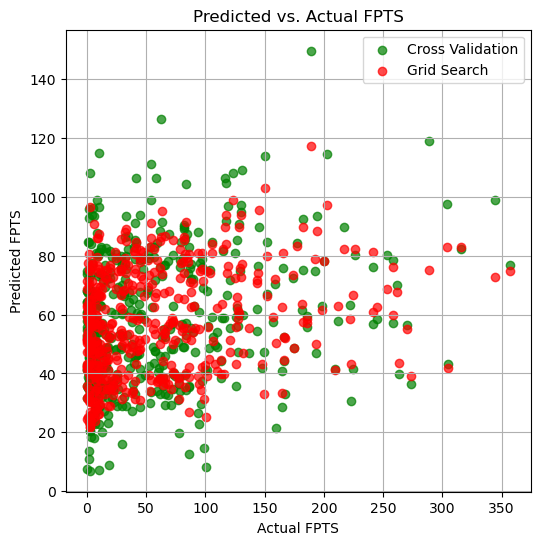

In [187]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_pred, alpha=0.7, color='g', label='Cross Validation')
plt.scatter(y_test, y_pred_grid, alpha=0.7, color='r', label='Grid Search')

plt.xlabel('Actual FPTS')
plt.ylabel('Predicted FPTS')
plt.title('Predicted vs. Actual FPTS')
plt.legend()
plt.grid(True)
plt.show()


In [178]:
from joblib import dump, load

In [179]:
dump(model, 'wr_regression_model.joblib') 
dump(grid_model, 'wr_grid_regression_model.joblib') 

['wr_grid_regression_model.joblib']